In [1]:
from coba.benchmarks import Result
from coba.analysis import Plots
import numpy as np
import pandas as pd

In [6]:
result = Result.from_transaction_file('benchmark1.log')

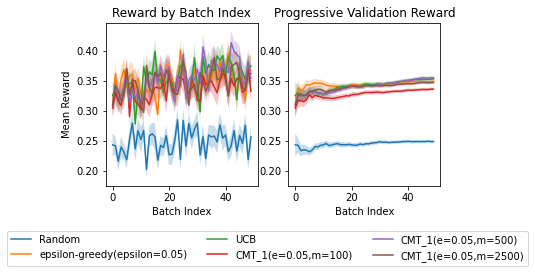

In [7]:
Plots.standard_plot(result, show_err=True)

In [9]:
result

{'Learners': 6, 'Simulations': 45, 'Batches': 13430}

In [8]:
l,s,b = result.to_pandasb

In [10]:
b.groupby('learner_id').mean().join(l).sort_values('reward')

,simulation_id,batch_index,N,reward,learner_id,family,full_name,epsilon,e,m
learner_id,,,,,,,,,,
0,25.777778,24.500000,29.380889,0.249205,0,Random,Random,NaN,NaN,NaN
3,25.777778,24.500000,29.380889,0.336665,3,CMT_1,"CMT_1(e=0.05,m=100)",NaN,0.05,100.0
5,25.250000,24.500000,29.139545,0.347871,5,CMT_1,"CMT_1(e=0.05,m=2500)",NaN,0.05,2500.0
1,25.777778,24.500000,29.380889,0.349760,1,epsilon-greedy,epsilon-greedy(epsilon=0.05),0.05,NaN,NaN
2,25.777778,24.500000,29.380889,0.353791,2,UCB,UCB,NaN,NaN,NaN
4,25.569507,24.365471,29.285650,0.355778,4,CMT_1,"CMT_1(e=0.05,m=500)",NaN,0.05,500.0


In [11]:
pd.merge(l,b[b.batch_index == 49].groupby('learner_id').mean(), on='learner_id').sort_values('reward')

,learner_id,family,full_name,epsilon,e,m,simulation_id,batch_index,N,reward
0,0,Random,Random,NaN,NaN,NaN,25.777778,49.0,29.155556,0.273163
3,3,CMT_1,"CMT_1(e=0.05,m=100)",NaN,0.05,100.0,25.777778,49.0,29.155556,0.347591
4,4,CMT_1,"CMT_1(e=0.05,m=500)",NaN,0.05,500.0,25.250000,49.0,28.909091,0.368769
5,5,CMT_1,"CMT_1(e=0.05,m=2500)",NaN,0.05,2500.0,25.250000,49.0,28.909091,0.377070
1,1,epsilon-greedy,epsilon-greedy(epsilon=0.05),0.05,NaN,NaN,25.777778,49.0,29.155556,0.381435
2,2,UCB,UCB,NaN,NaN,NaN,25.777778,49.0,29.155556,0.389237


<AxesSubplot:ylabel='Frequency'>

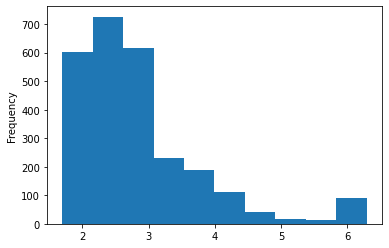

In [7]:
np.log10(s['interaction_count']).plot(kind="hist")

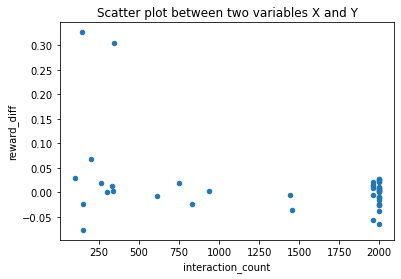

In [24]:
bb = b.copy()
ss = s.copy()

bb.simulation_id = bb.simulation_id.astype('int')
ss.simulation_id = ss.simulation_id.astype('int')

bb['mod_sim_id'] = bb.simulation_id % 497
ss['mod_sim_id'] = ss.simulation_id % 497

bb = bb.groupby(['learner_id','mod_sim_id'], as_index=False).mean()

a = pd.merge(bb[bb.learner_id == 4],ss, on='mod_sim_id')
c = pd.merge(bb[bb.learner_id == 5],ss, on='mod_sim_id')

a.reward = a.reward.astype('float')
c.reward = c.reward.astype('float')

a['reward_diff']             = a.reward - c.reward
a['interaction_count_log10'] = np.log10(a.interaction_count)

a.plot.scatter(x='interaction_count', y='reward_diff', title= "Scatter plot between two variables X and Y");

In [22]:
result

{'Learners': 6, 'Simulations': 45, 'Batches': 13430}

In [9]:
(1/s.action_count).mean()

0.25848443223443224